In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np



In [160]:
from itertools import cycle, islice
class Port:
    def __init__(self,csv_path='port.csv'):
        self.df = pd.read_csv(csv_path,index_col='Symbol')
        assert myPort.df['Total'].describe().dtype.name == 'float64' , "Value in Total column must be float"
        assert myPort.df['Cost'].describe().dtype.name == 'float64' , "Value in Cost column must be number"
        assert myPort.df['Volume'].describe().dtype.name == 'float64' , "Value in Volume column must be number"
        assert myPort.df['Dividend'].describe().dtype.name == 'float64' , "Value in Dividend column must be number"
        self.total_cost = sum(self.df['Total'])
        self.updateLatestPrice()
        
    def chart(self):
        def func(pct, df):
            allvals = df['Total'].tolist()
            absolute = pct/100.*np.sum(allvals)
            index = [i for i in range(len(df['Total'].tolist())) if df['Total'].tolist()[i] == float("{:.2f}".format(absolute))]
            return "{:.1f}%\n{:.2f} ฿\n{:d} volume".format(pct, absolute,int(df.iloc[index[0]]['Volume']))
        self.df.plot.pie(y="Total",title='asset allocation' , autopct=lambda pct: func(pct, self.df),figsize=(12,12))
        return
    
    @staticmethod
    def getLatestPrice(symbol):
        separate = Port.getDataFromHTML(url='https://marketdata.set.or.th/mkt/stockquotation.do?symbol='+symbol +'&ssoPageId=1&language=th&country=TH')
        return float(separate.iloc[1][-1])
    def updateLatestPrice(self):
        for x in self.df.index:
            self.df.loc[x,'Latest'] = Port.getLatestPrice(x)
            self.df.loc[x,'Profit'] = float("{:.2f}".format((Port.getLatestPrice(x) - self.df.loc[x,'Cost'])*self.df.loc[x,'Volume']))
        
    def HPR(self):
        for x in self.df.index:
            self.df.loc[x,'HPR'] = (self.df.loc[x,'Dividend']+(self.df.loc[x,'Latest']-self.df.loc[x,'Cost']))/self.df.loc[x,'Cost']
            
    def saveToCSV(self):
        self.df.to_csv('port.csv')
        return 
    
    def describe(self):
        total_cost = float("{:.2f}".format(sum(self.df['Total'])))
        total_profit = float("{:.2f}".format(sum(self.df['Profit'])))
        values = self.df['Profit'].tolist()
        clrs = ['red' if (x < 0) else 'green' for x in values ]
        self.df.plot.bar(y="Profit",figsize=(12,5),title="Profit/Loss" ,color=clrs)
        print("Cost   : {} BATH".format(total_cost),end=" | ")
        print("Profit : {} BATH".format(total_cost+total_profit),end=" | ")
        print("Relize : {} BATH".format(total_profit))
        self.chart()
    
    @staticmethod
    def getDataFromHTML(url,index_col=''):
        try:
            if index_col != '':
                return pd.read_html(url,index_col=0)[0]
            else:
                return pd.read_html(url)[0]
        except:
            assert False, "โปรดตรวจสอบ URL ของท่าน"
        
    @staticmethod
    def IR(symbol,DIV,G=5):
        try:
            int(DIV)
            int(G)
            
        except:
            assert False , "DIV and G must be number"
            
        if G==DIV:
                assert False , "DIV ต้องไม่เท่ากับ G"
        print("Instrinsic Value ของหุ้น {} \n(ใช้การข้อมูลการคำนวณจากปีปัจจุบัน - 2)".format(symbol))
        d = Port.getDataFromHTML(url='https://www.set.or.th/set/companyhighlight.do?symbol='+symbol+'&ssoPageId=5&language=th&country=TH',index_col=0)
        market_value = float(d.loc['ราคาล่าสุด(บาท)'].tolist()[-3])
        PBV = float(d.loc['P/BV (เท่า)'].tolist()[-3])
        BVPS = float(d.loc['มูลค่าหุ้นทางบัญชีต่อหุ้น (บาท)'].tolist()[-3])
        ROE = float(d.loc['ROE(%)'].tolist()[-3])/100
        G = G/100
        DIV = DIV/100
        print("ข้อมูลที่ใช้ในการคำนวณ\nMarket Value : {}\nROE : {}\nBVPS : {}\nอัตราการขยายตัวของกำไรต่อหุ้น : {}\nอัตราผลตอบแทนที่ต้องการ : {} ".format(market_value, ROE , BVPS, G, DIV))
        V = BVPS + ((ROE-DIV)/(DIV-G))*BVPS
        print("ราคาหุ้นปัจจุบัน {:.2f}".format(float(d.loc['ราคาล่าสุด(บาท)'].tolist()[-1])))
        print("Instrinsic Value (มูลค่าราคาหุ้น) : {:.2f}".format(V))
        print("----------------------------------------------")
        
    def getAdjClose(df):
        data = {}
        for x in df.index:
            data[x] = pdr.get_data_yahoo(x+'.BK')['Adj Close']
        data = pd.DataFrame(data)
        return data
    
    def PairTrade(df,symbol1,symbol2):
        data['diff'] = data[symbol1] - data[symbol2]
        d = data[[symbol1,symbol2,'diff']]
        d.plot()
        d.plot.hist(y='diff')
        d['mean'] = d['diff'].mean()
        d['-1SD'] = d['diff'].mean() - d['diff'].std()
        d['+1SD'] = d['diff'].mean() + d['diff'].std()
        d.plot(y=['diff','-1SD','mean','+1SD'])
        print("Mean : {} , SD : {} ".format(d['diff'].mean(),d['diff'].std()))
    
    
    def checkIR(self,div):
        for x in self.df.index:
            Port.IR(x,div)

Cost   : 2477.06 BATH | Profit : 2442.25 BATH | Relize : -34.81 BATH


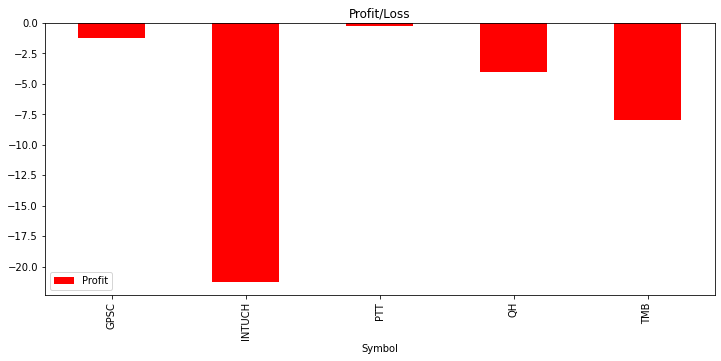

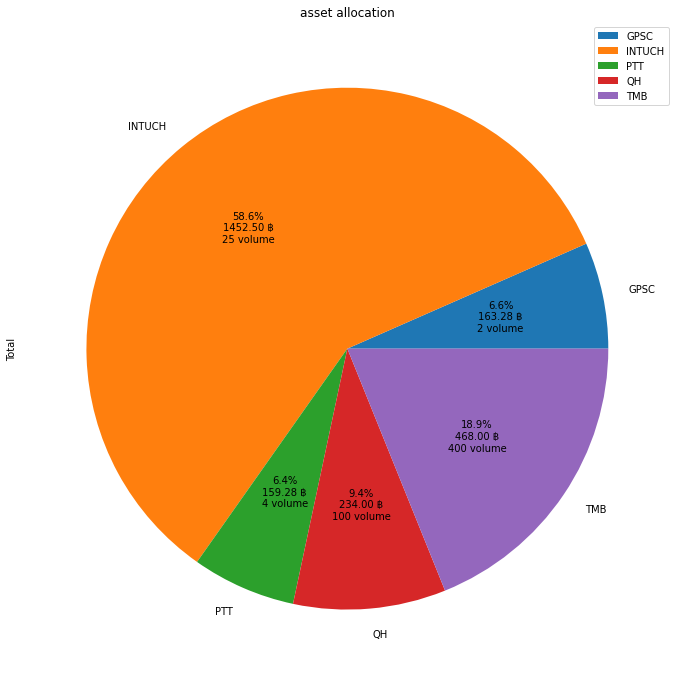

In [161]:
myPort = Port()
myPort.describe()

In [163]:
myPort.checkIR(div=10)

Instrinsic Value ของหุ้น GPSC 
(ใช้การข้อมูลการคำนวณจากปีปัจจุบัน - 2)
ข้อมูลที่ใช้ในการคำนวณ
Market Value : 85.75
ROE : 0.0576
BVPS : 18.69
อัตราการขยายตัวของกำไรต่อหุ้น : 0.05
อัตราผลตอบแทนที่ต้องการ : 0.1 
ราคาหุ้นปัจจุบัน 81.50
Instrinsic Value (มูลค่าราคาหุ้น) : 2.84
----------------------------------------------
Instrinsic Value ของหุ้น INTUCH 
(ใช้การข้อมูลการคำนวณจากปีปัจจุบัน - 2)
ข้อมูลที่ใช้ในการคำนวณ
Market Value : 57.25
ROE : 0.3395
BVPS : 10.12
อัตราการขยายตัวของกำไรต่อหุ้น : 0.05
อัตราผลตอบแทนที่ต้องการ : 0.1 
ราคาหุ้นปัจจุบัน 57.75
Instrinsic Value (มูลค่าราคาหุ้น) : 58.59
----------------------------------------------
Instrinsic Value ของหุ้น PTT 
(ใช้การข้อมูลการคำนวณจากปีปัจจุบัน - 2)
ข้อมูลที่ใช้ในการคำนวณ
Market Value : 44.0
ROE : 0.106
BVPS : 30.31
อัตราการขยายตัวของกำไรต่อหุ้น : 0.05
อัตราผลตอบแทนที่ต้องการ : 0.1 
ราคาหุ้นปัจจุบัน 40.00
Instrinsic Value (มูลค่าราคาหุ้น) : 33.95
----------------------------------------------
Instrinsic Value ของหุ้น QH 
(ใช้การข้อ